## Подбор метода нормализации данных

In [13]:
from python_files.data import data
from python_files.full_col_list import full_col_list

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="ticks")

#### Объявим функцию для оценки признаков на нормальность

In [15]:
def diagnostic_plots(df, variable, title):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    plt.title('Histogram')
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.suptitle(title)
    plt.show()

#### Смотрим на признаки

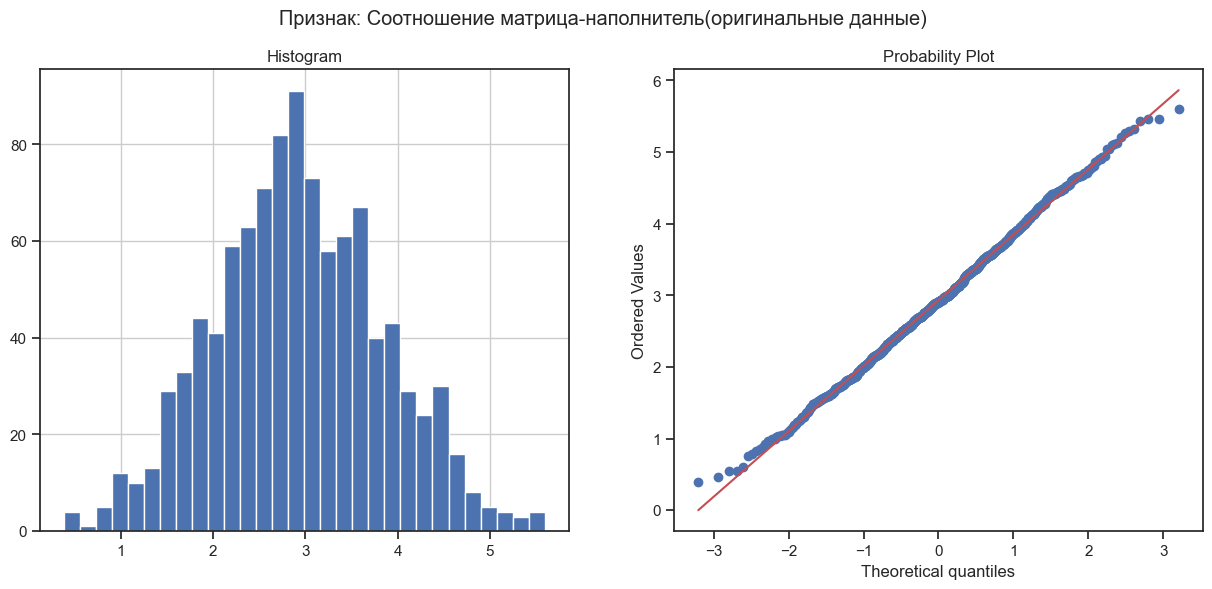

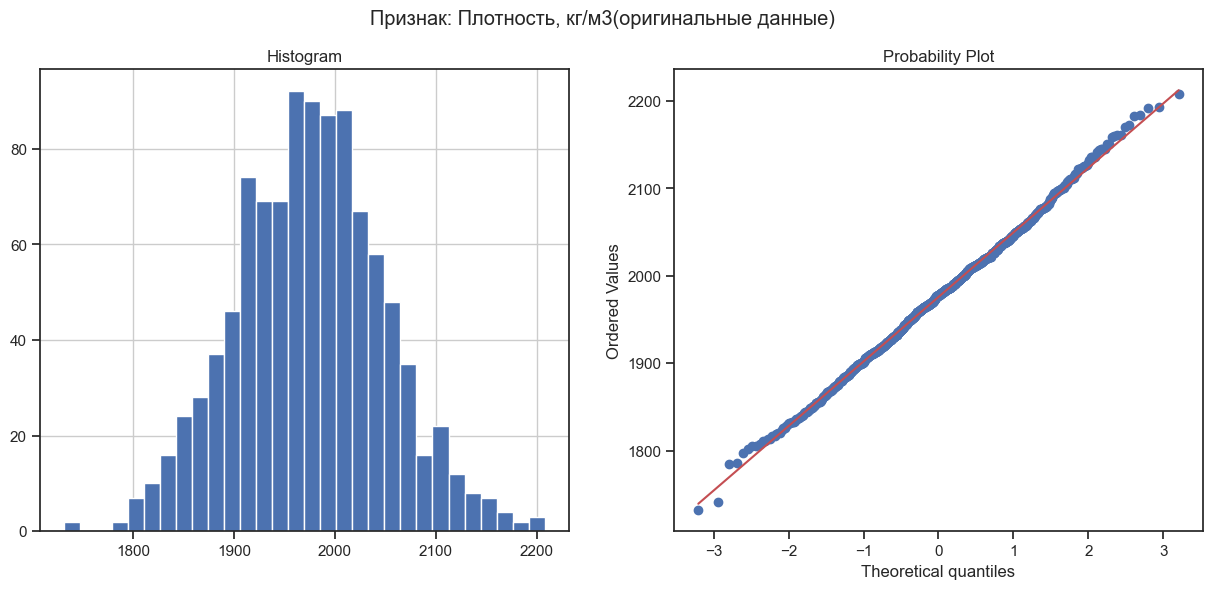

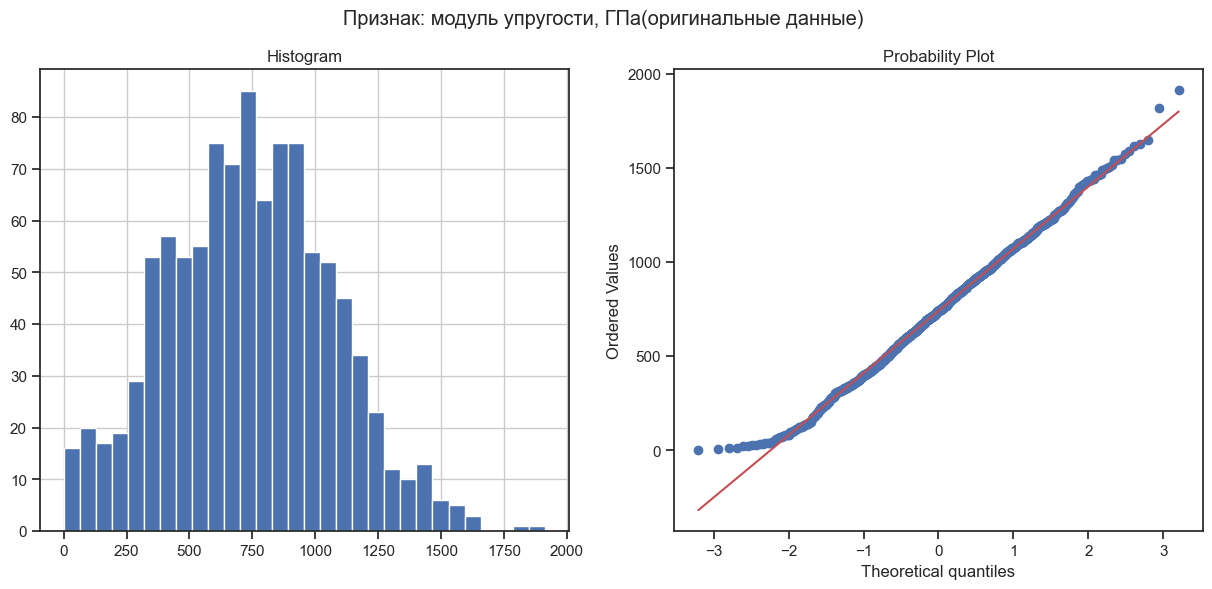

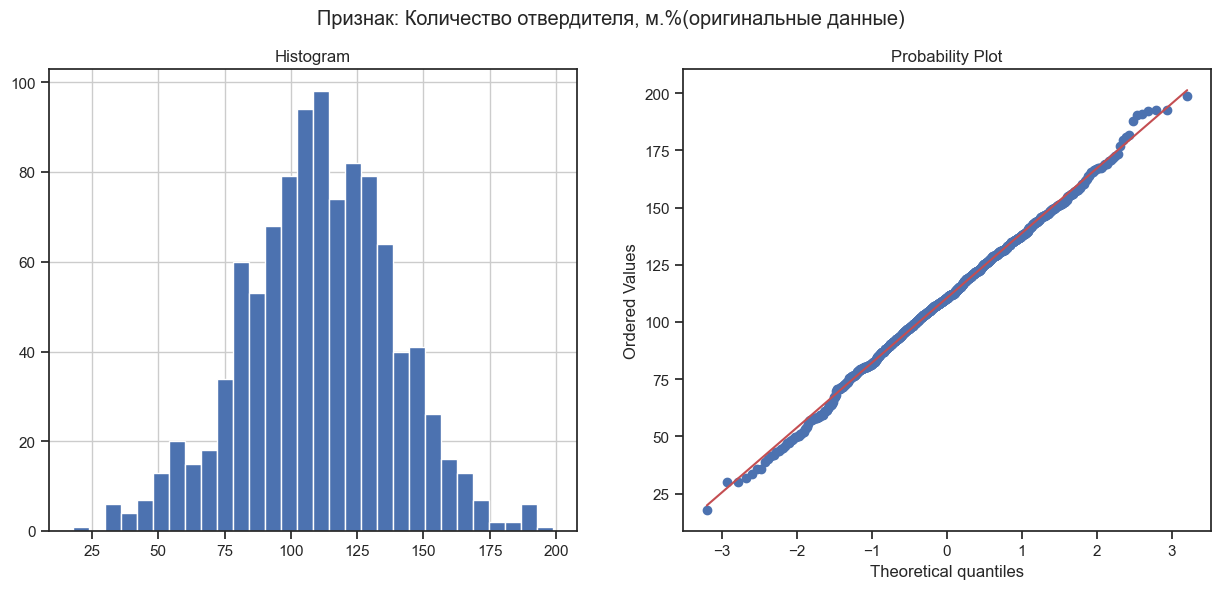

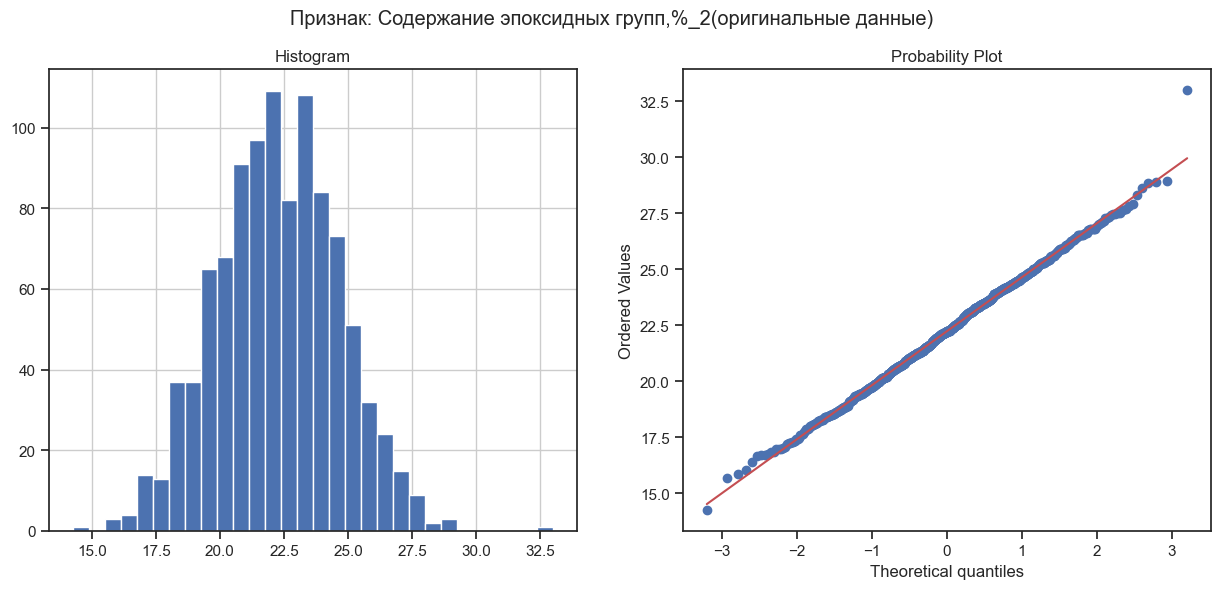

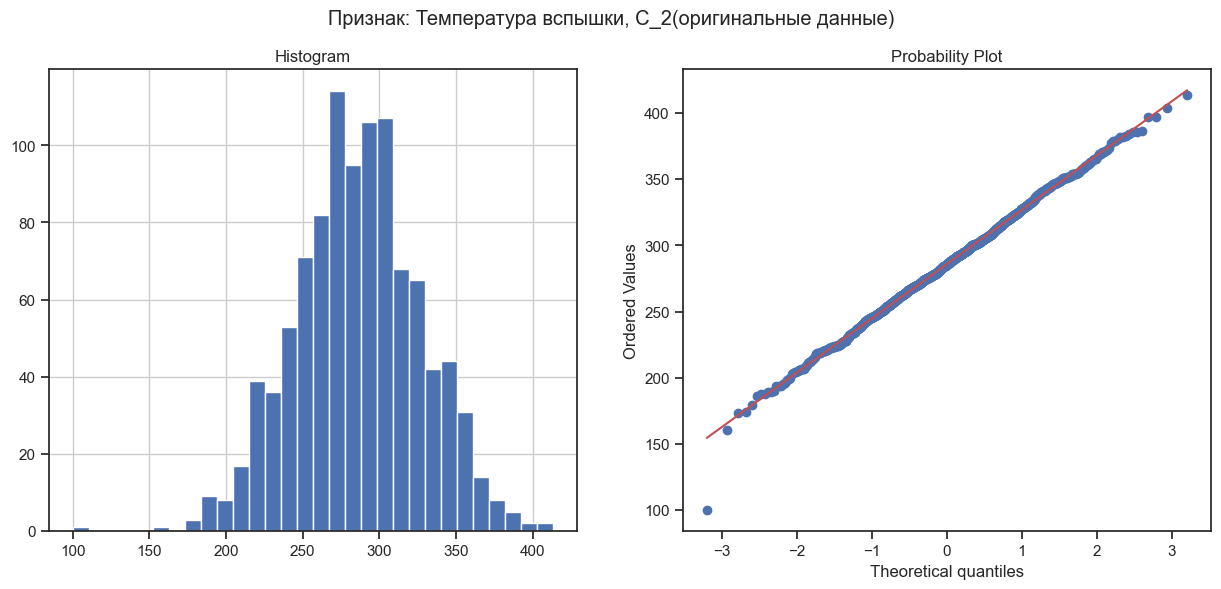

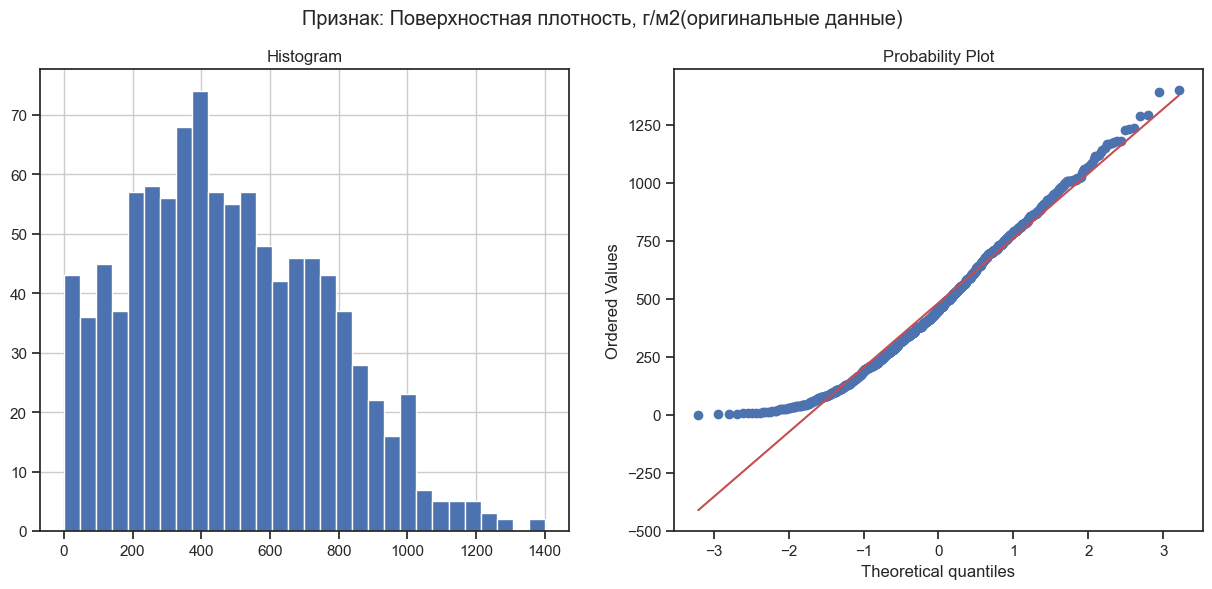

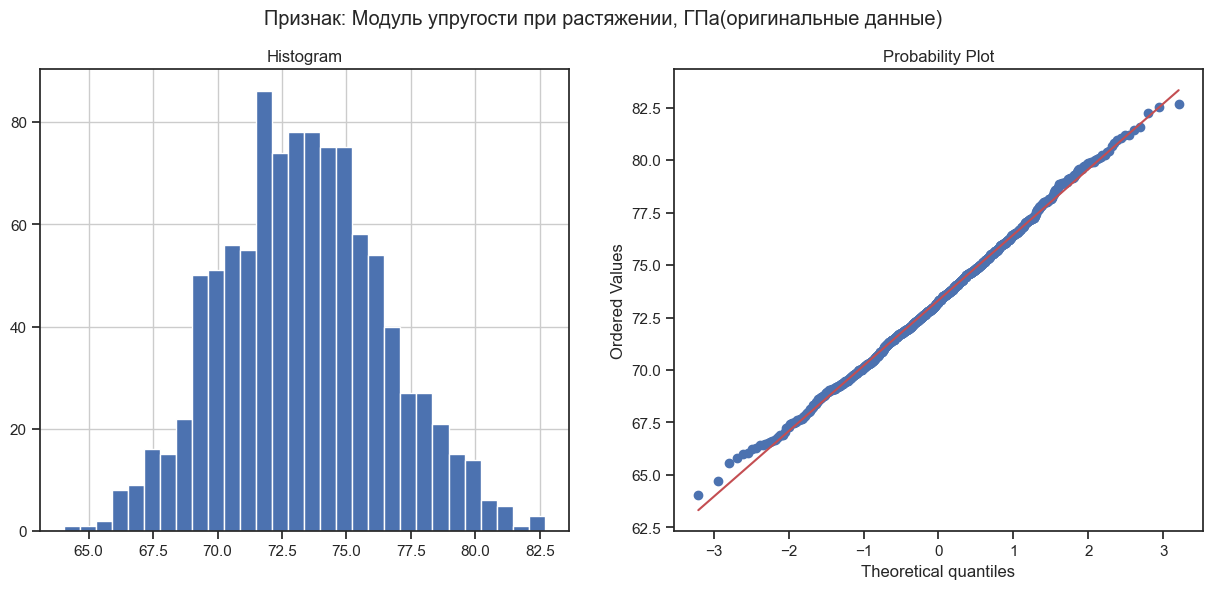

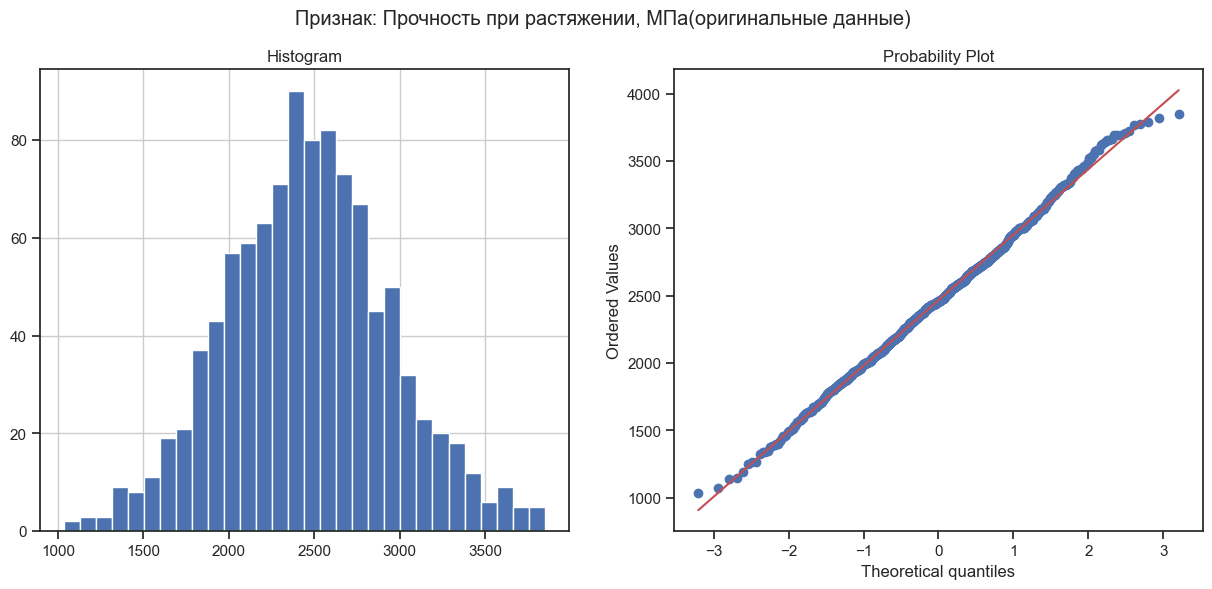

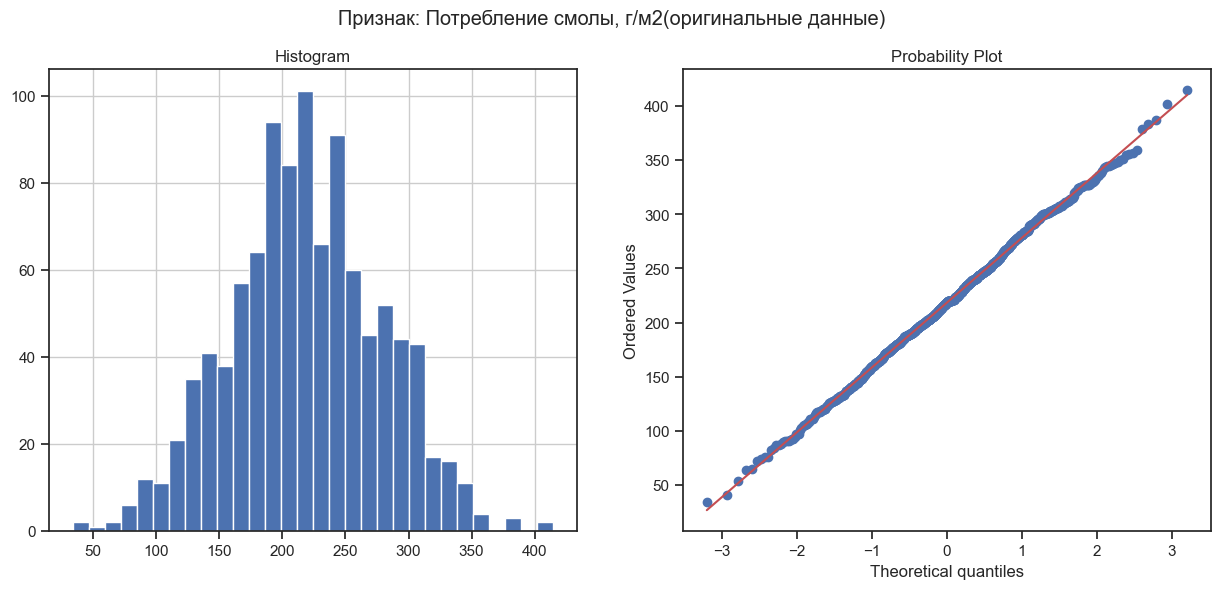

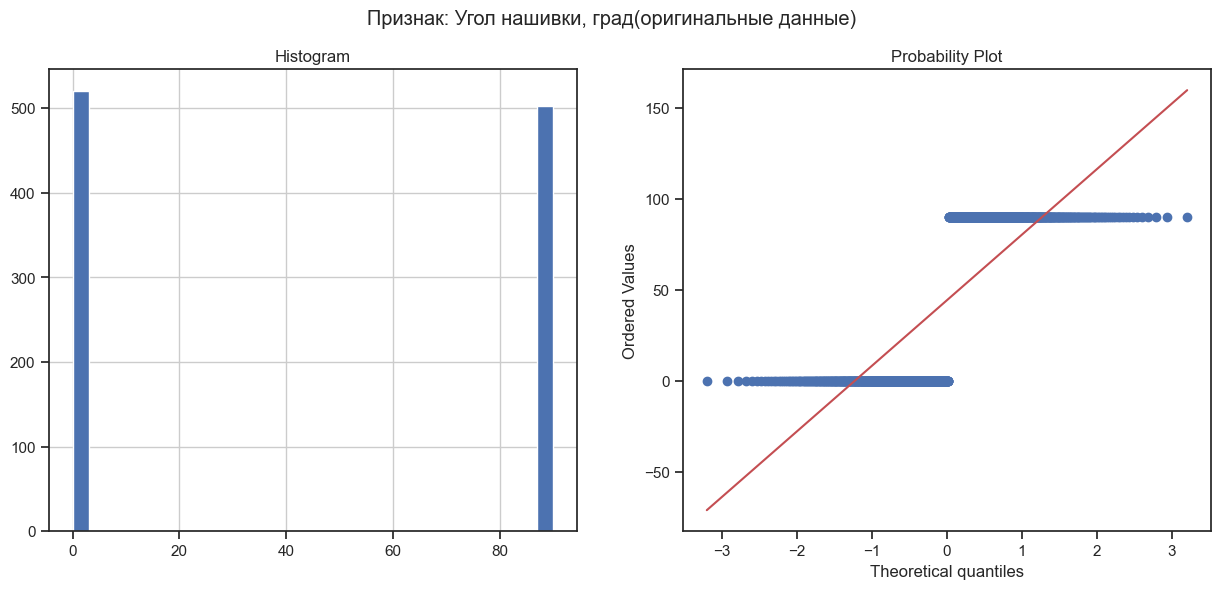

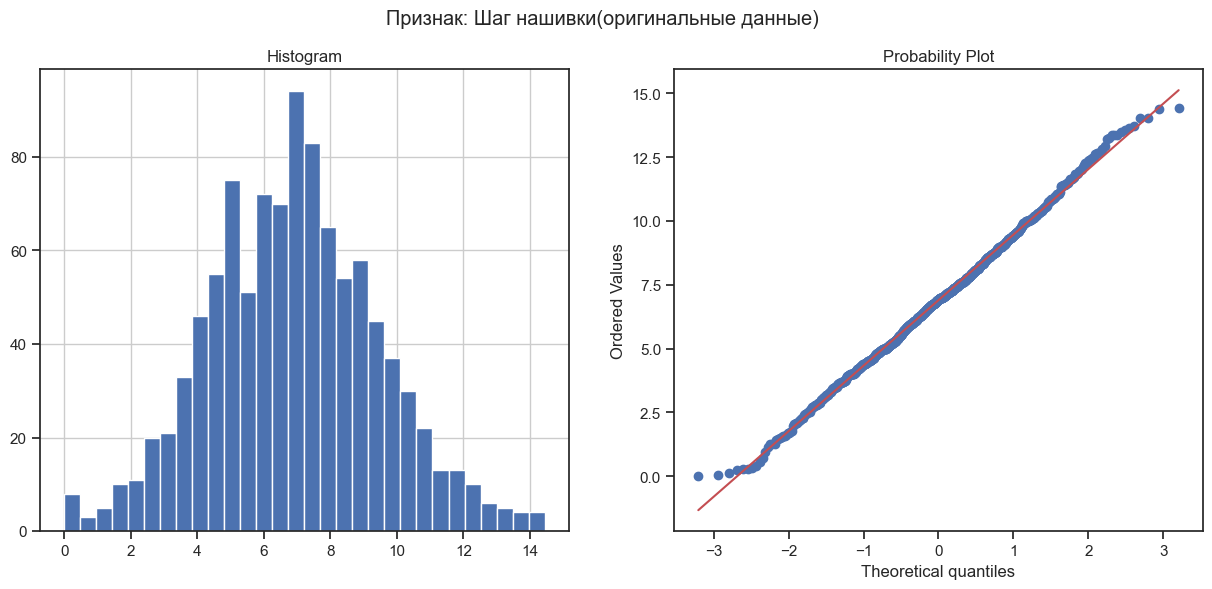

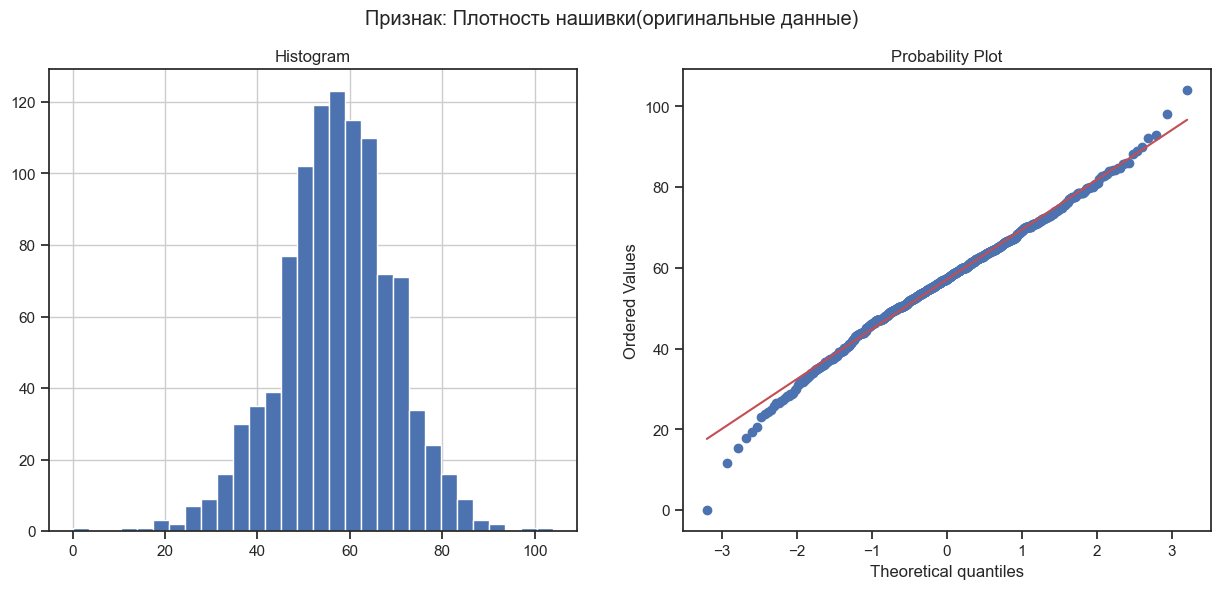

In [16]:
for col in full_col_list:
    title = 'Признак: {}(оригинальные данные)'.format(col)
    diagnostic_plots(data, col, title)

#### Вывод: признак 'Угол нашивки, град' несмотря на его физический смысл в условиях данной задачи можно рассматривать как бинарный; признак 'Поверхностная плотность, г/м2' имеет скошенное распределение, которое не будем изменять на нормальное для обучения моделей. Остальные признаки имеют исходные распределения близкие к нормальным - их будем нормализовывать. 

In [17]:
# отбрасываем признаки 'Угол нашивки, град', 'Поверхностная плотность, г/м2' (не распределнных по нормальному закону)
col_list_norm = full_col_list.drop(['Поверхностная плотность, г/м2', 'Угол нашивки, град'])
col_list_norm

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

### Нормализуем логарифмированием (ограничение - не работает с нулями)

In [18]:
# в датасете два столбца в которых имеются нулевые значения - 'Шаг нашивки' и 'Плотность нашивки'
# сохраним в новую переменную список признаков в которых нет нулевых значений 
col_list_9 = col_list_norm.drop(['Шаг нашивки', 'Плотность нашивки'])
col_list_9

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2'],
      dtype='object')

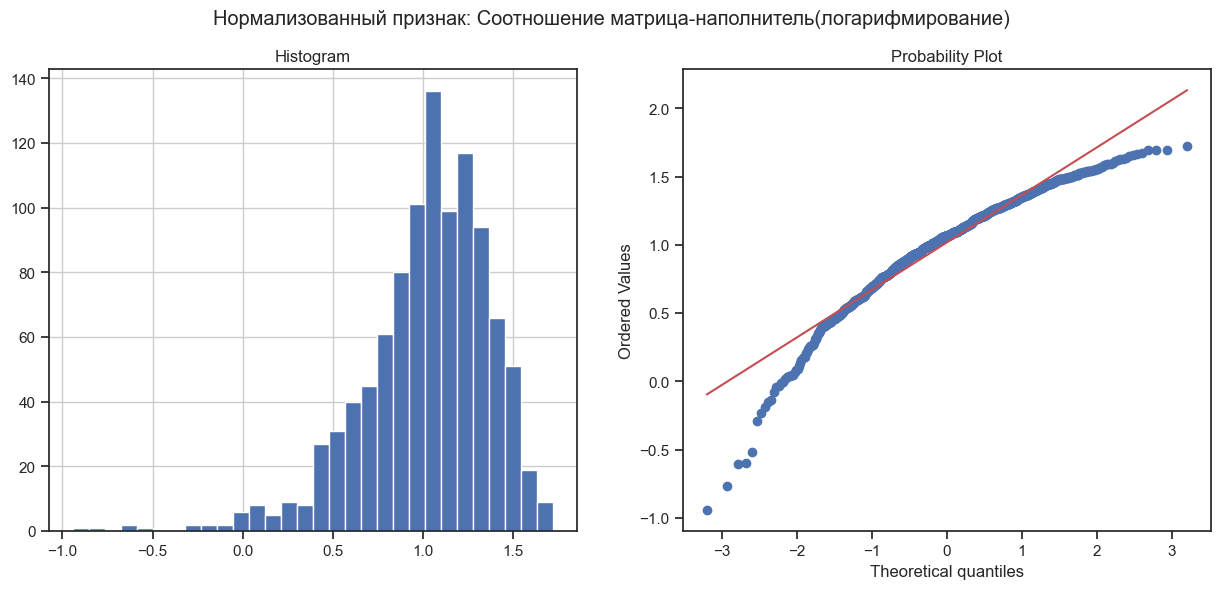

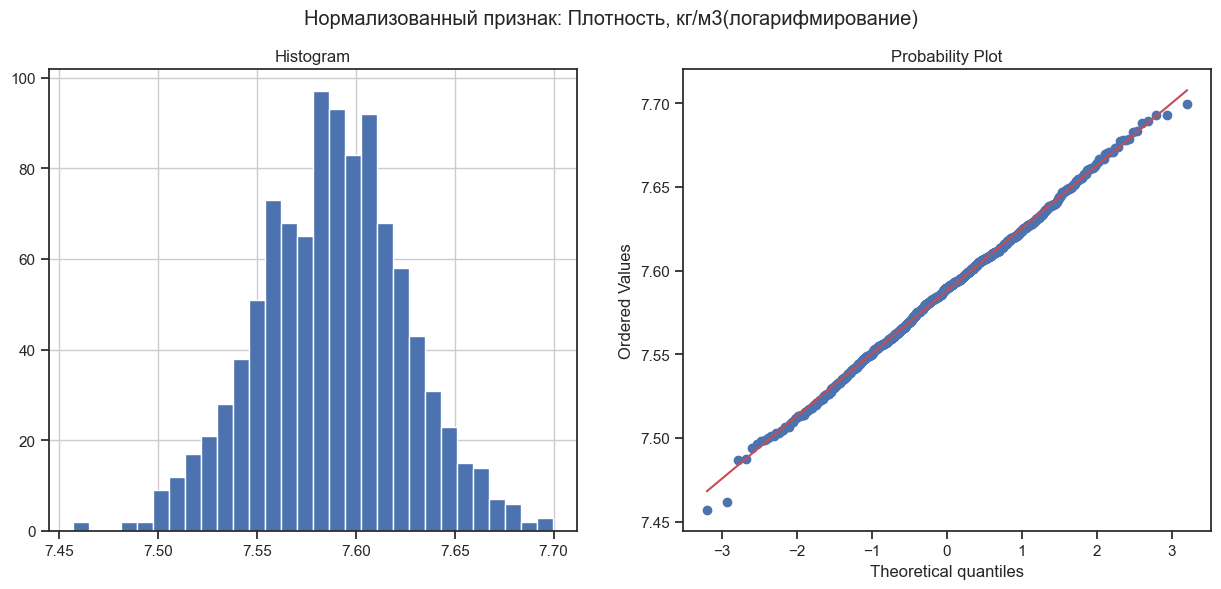

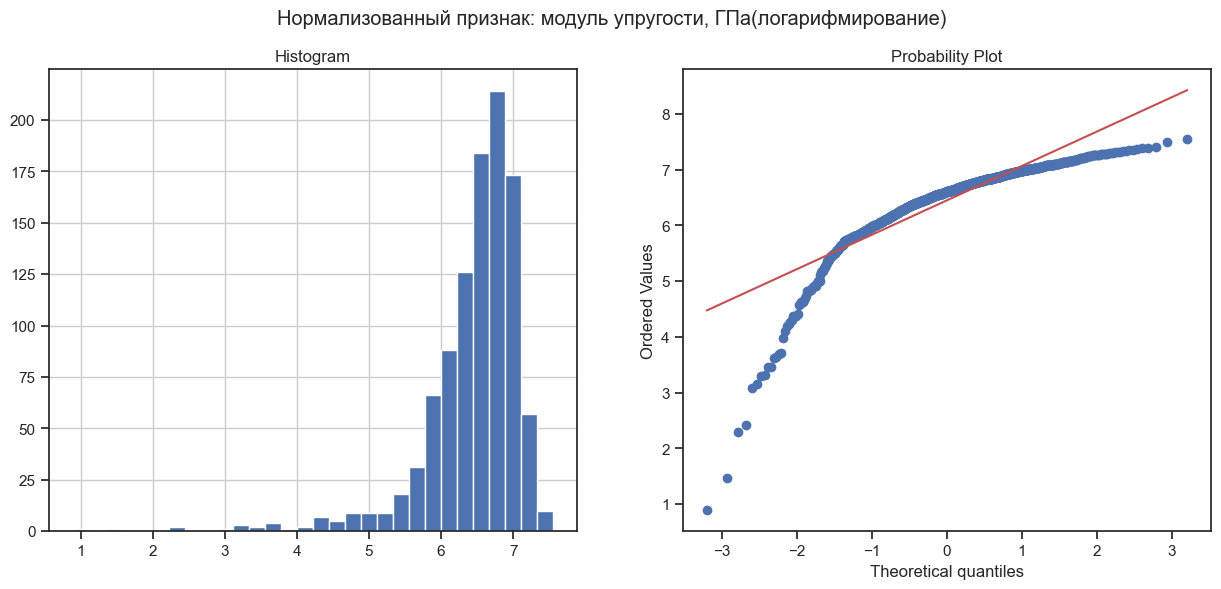

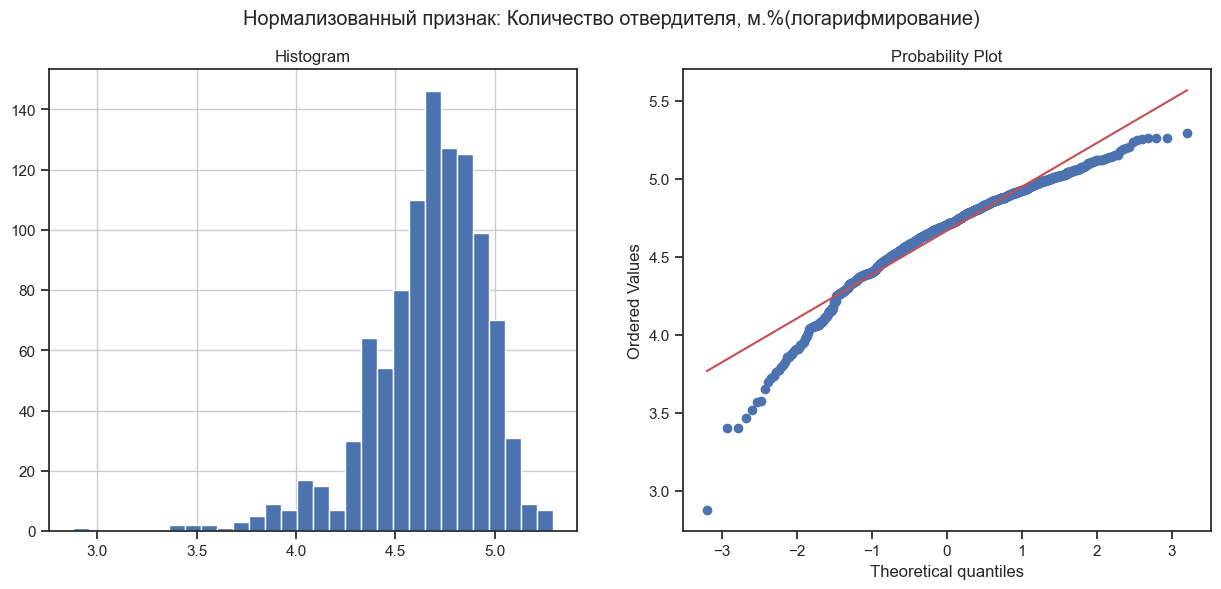

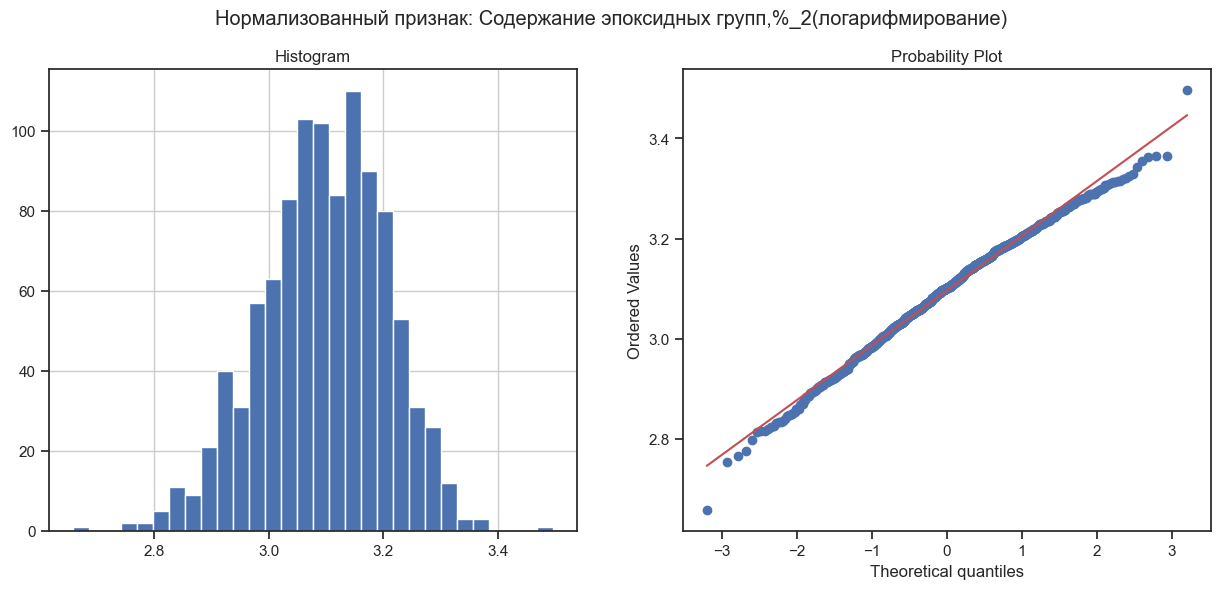

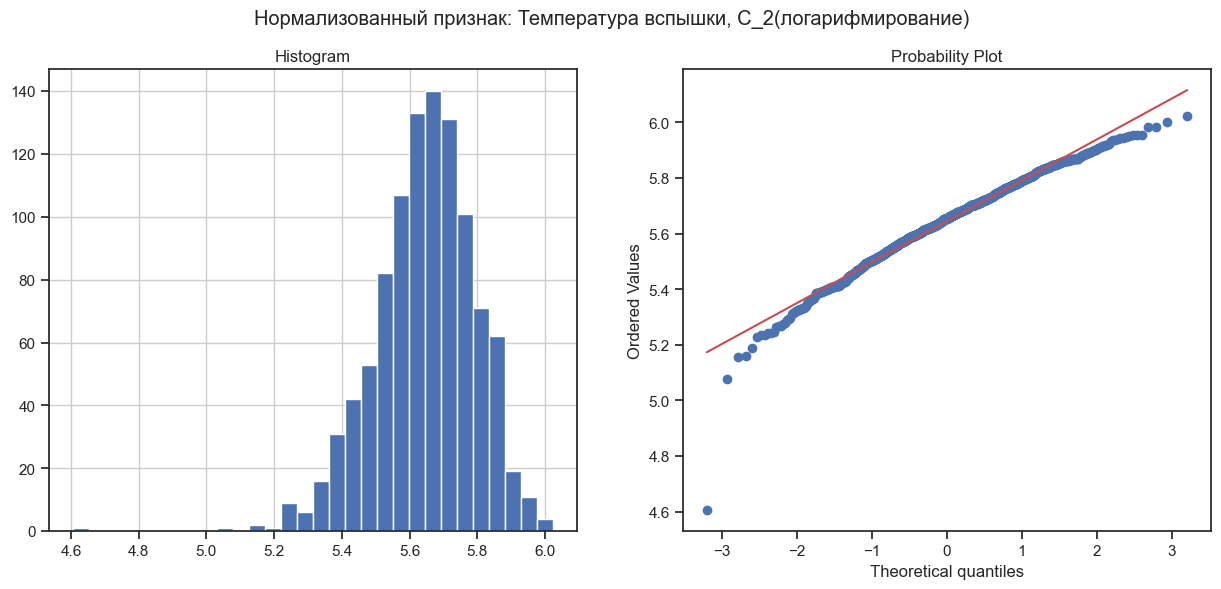

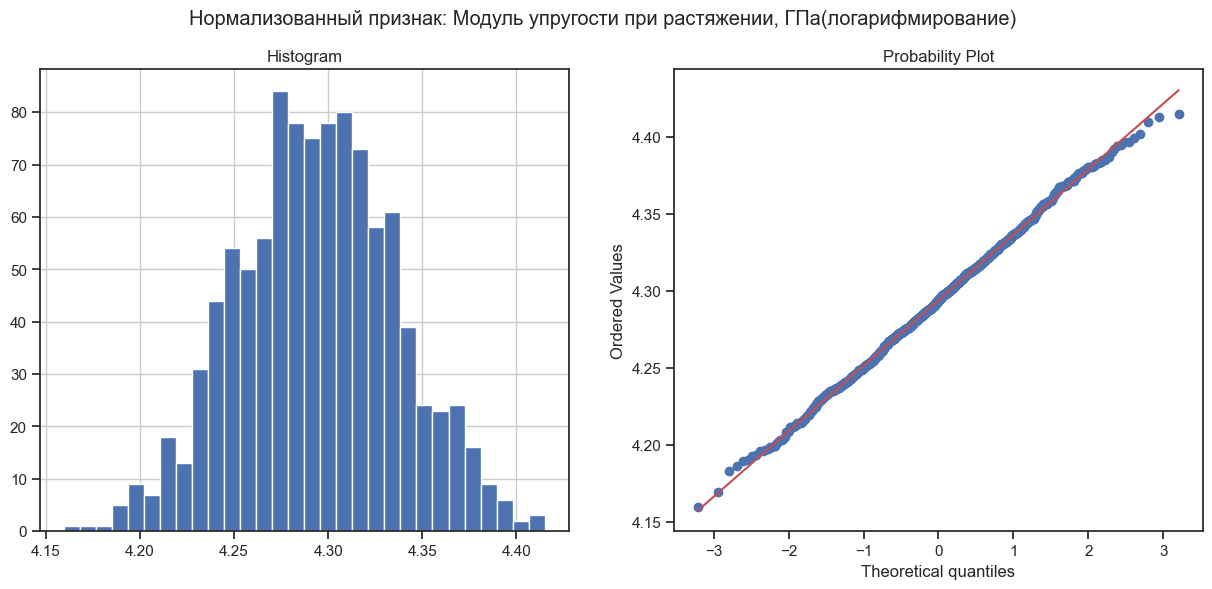

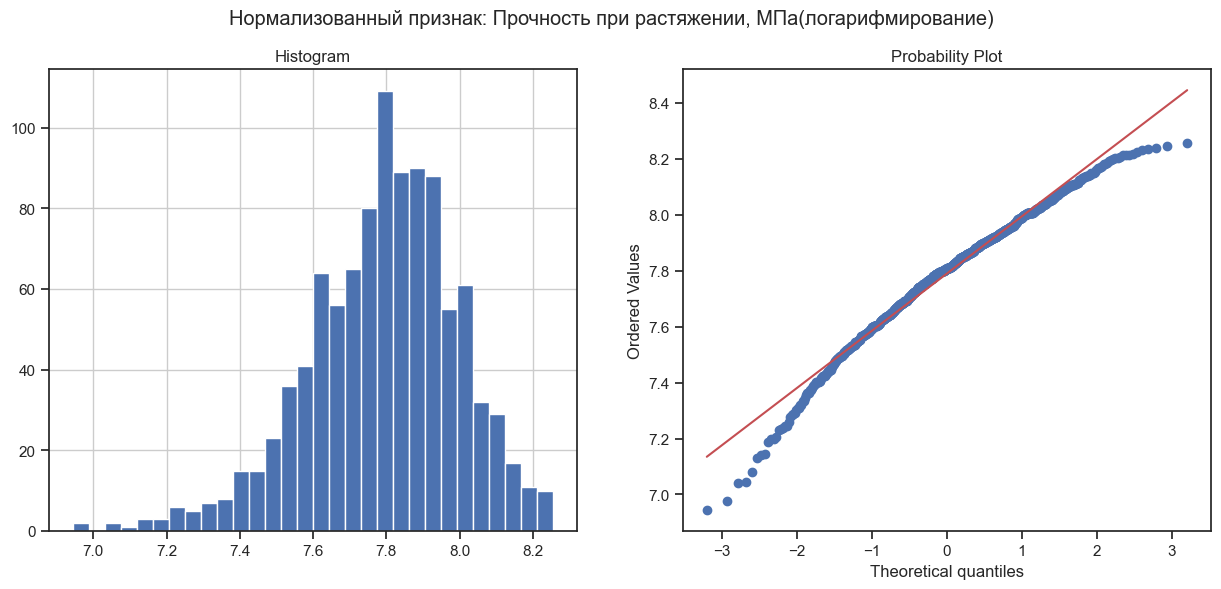

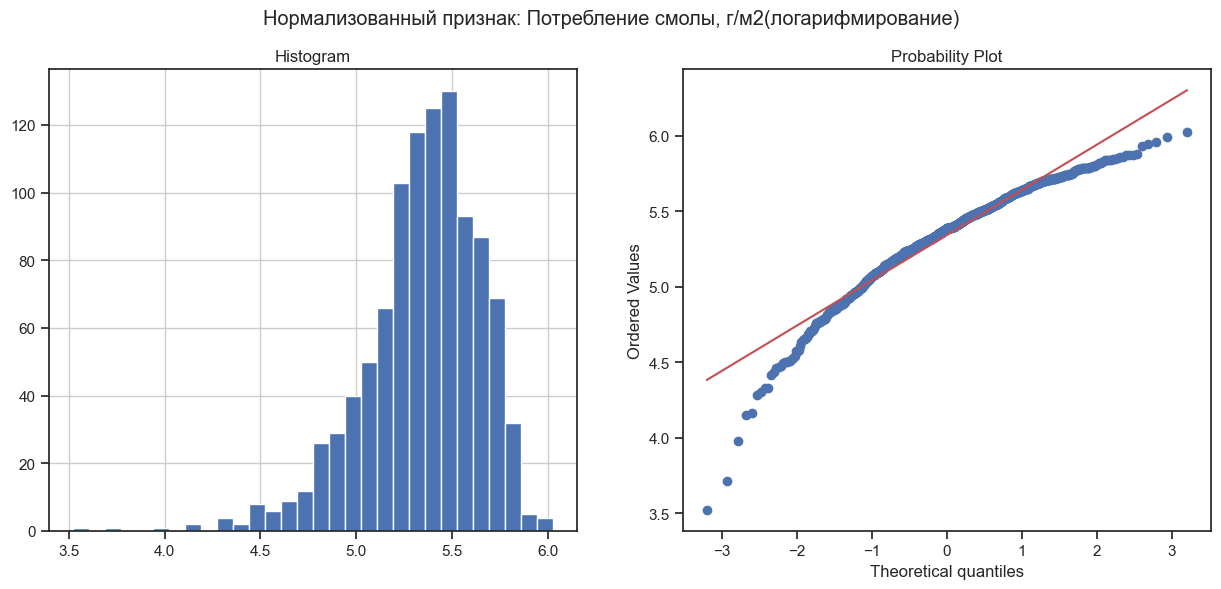

In [19]:
data_ = data.copy()
for col in col_list_9:
    data_[col] = np.log(data_[col])
    title = 'Нормализованный признак: {}(логарифмирование)'.format(col)
    diagnostic_plots(data_, col, title)

#### Нормализуем методом Бокса-Кокса (ограничение - не работает с нулями)

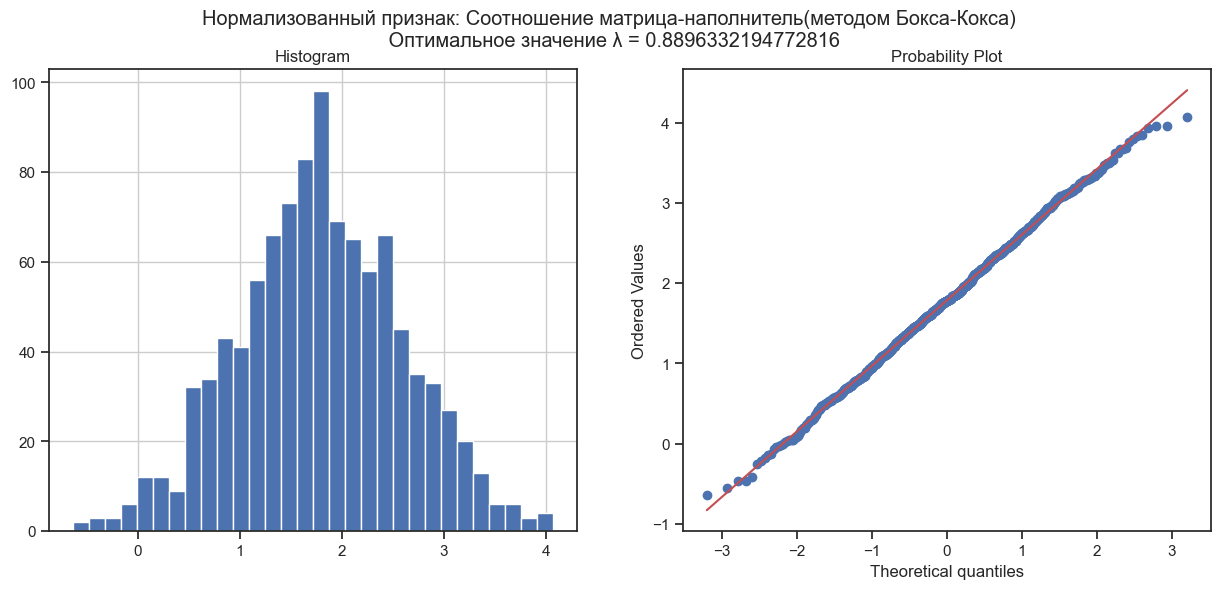

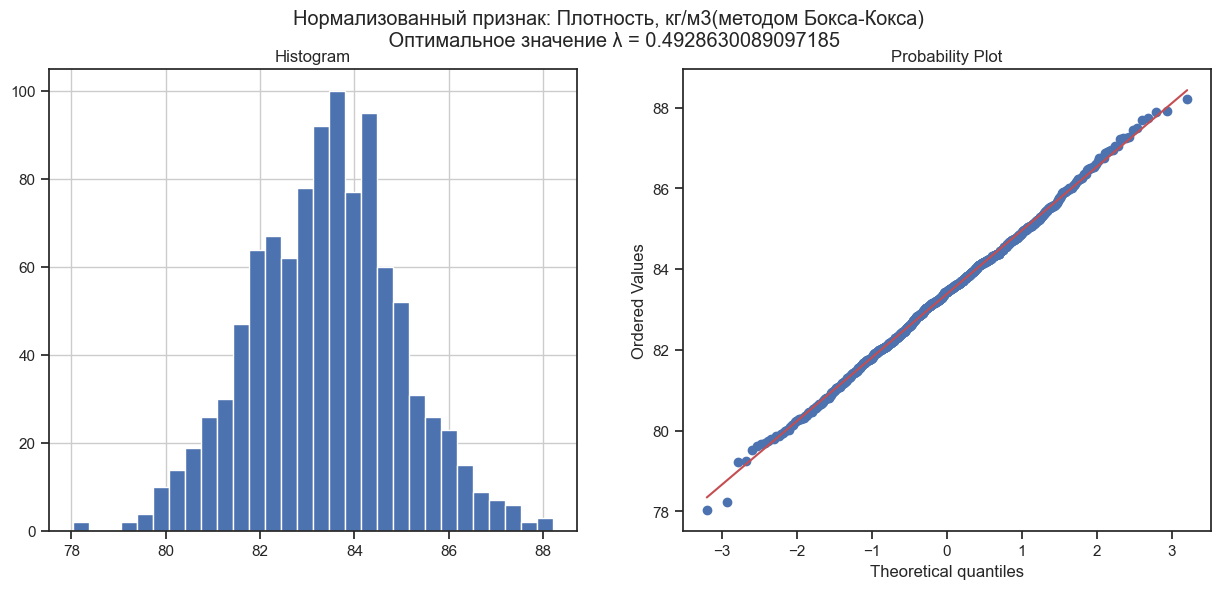

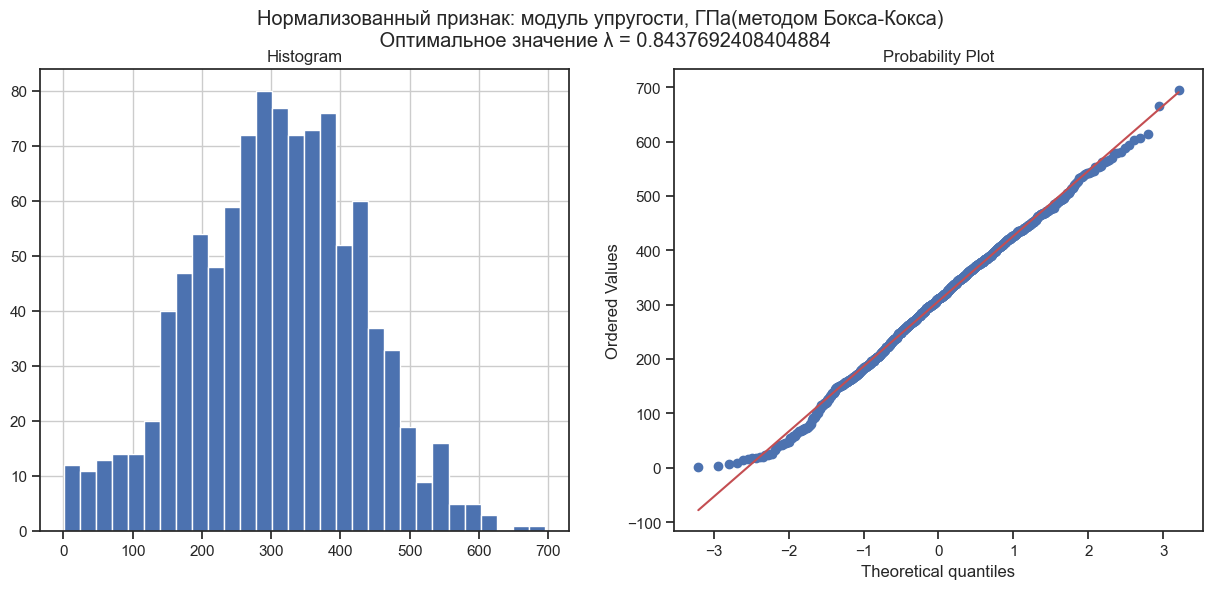

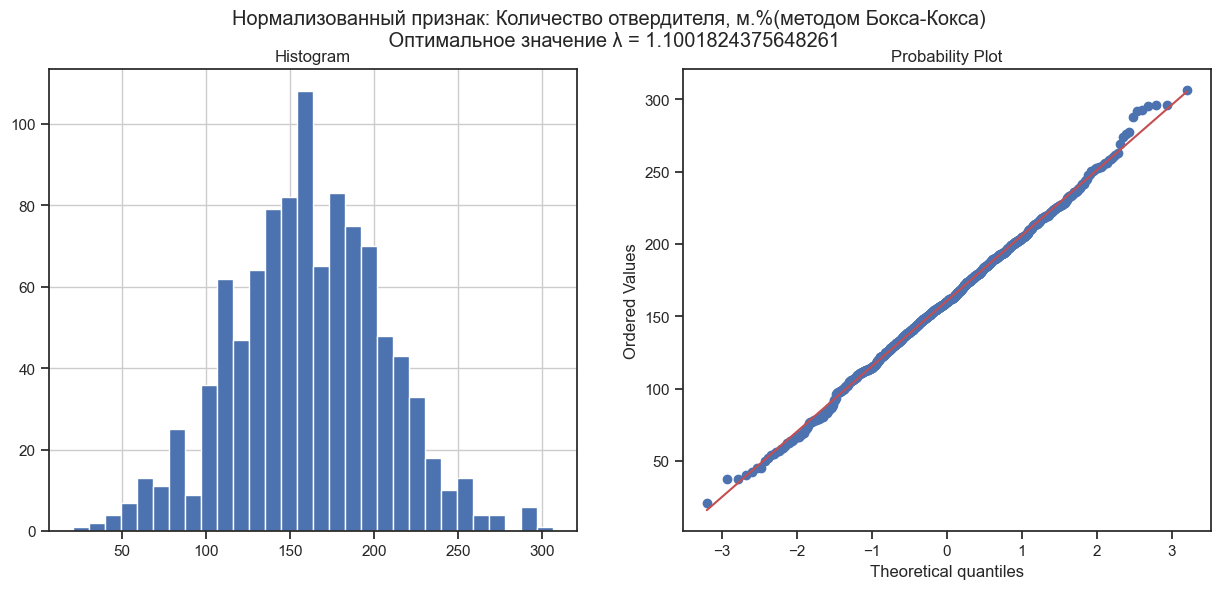

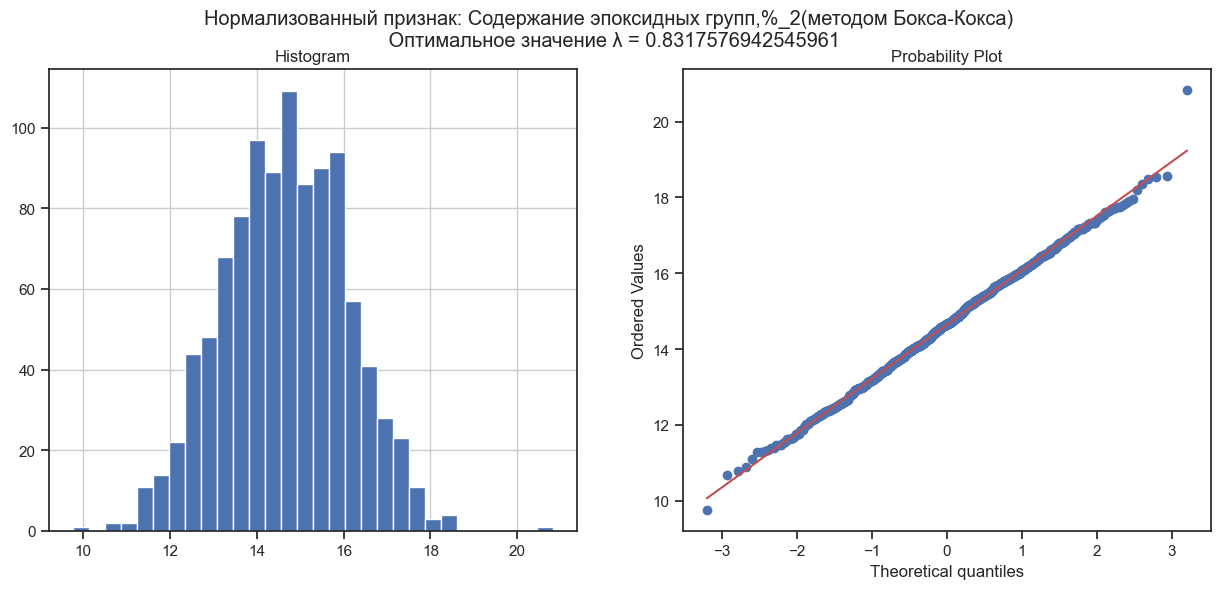

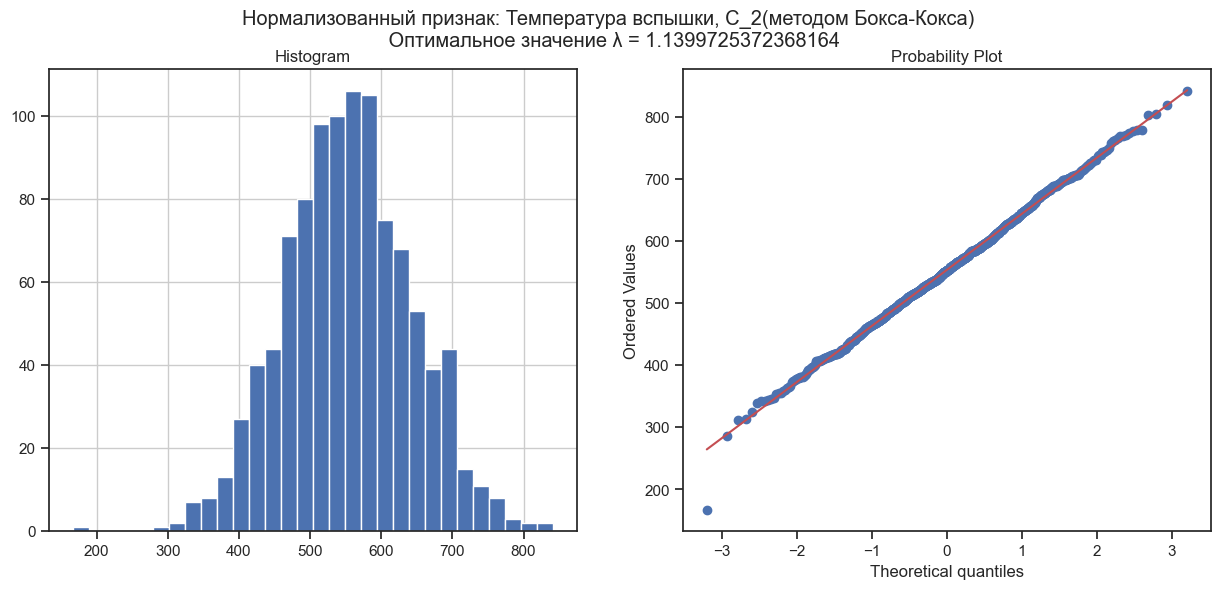

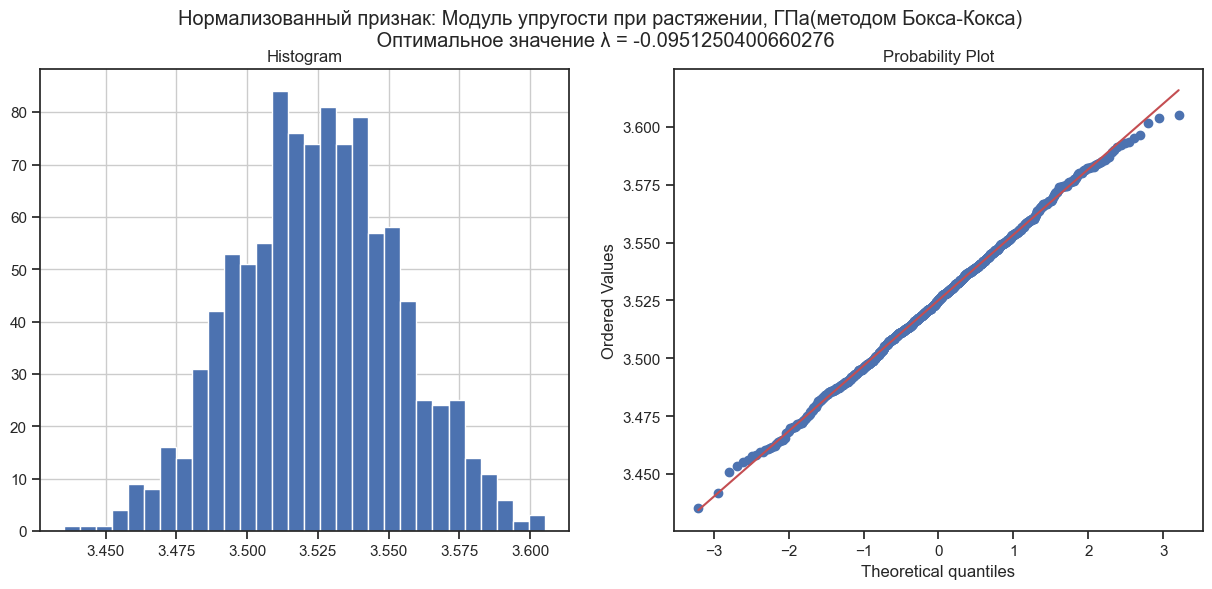

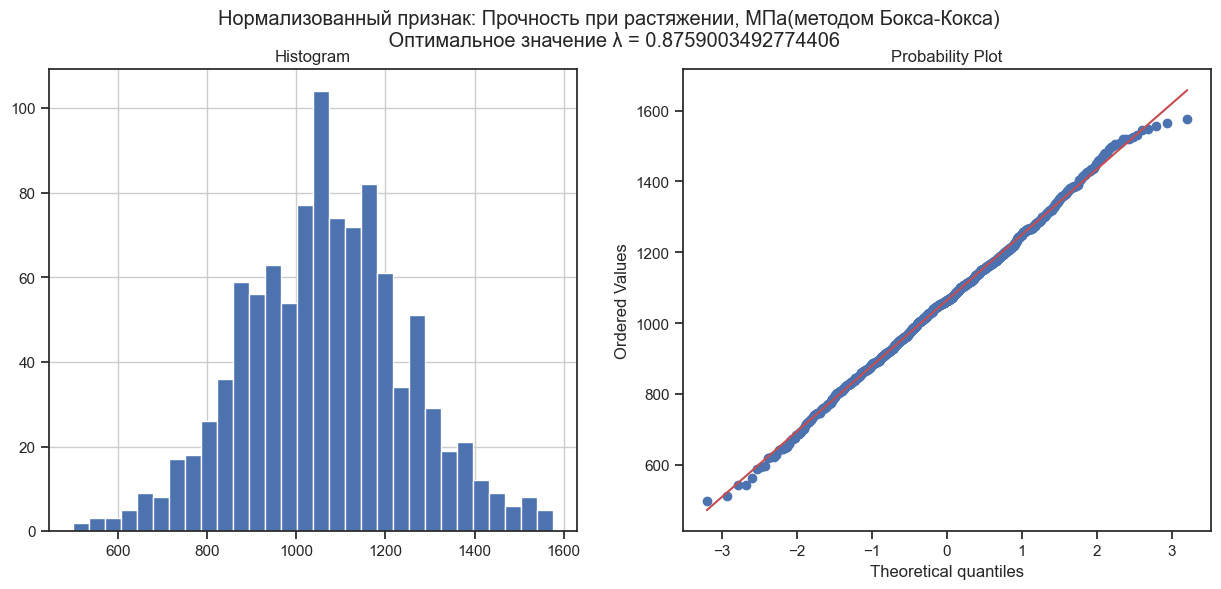

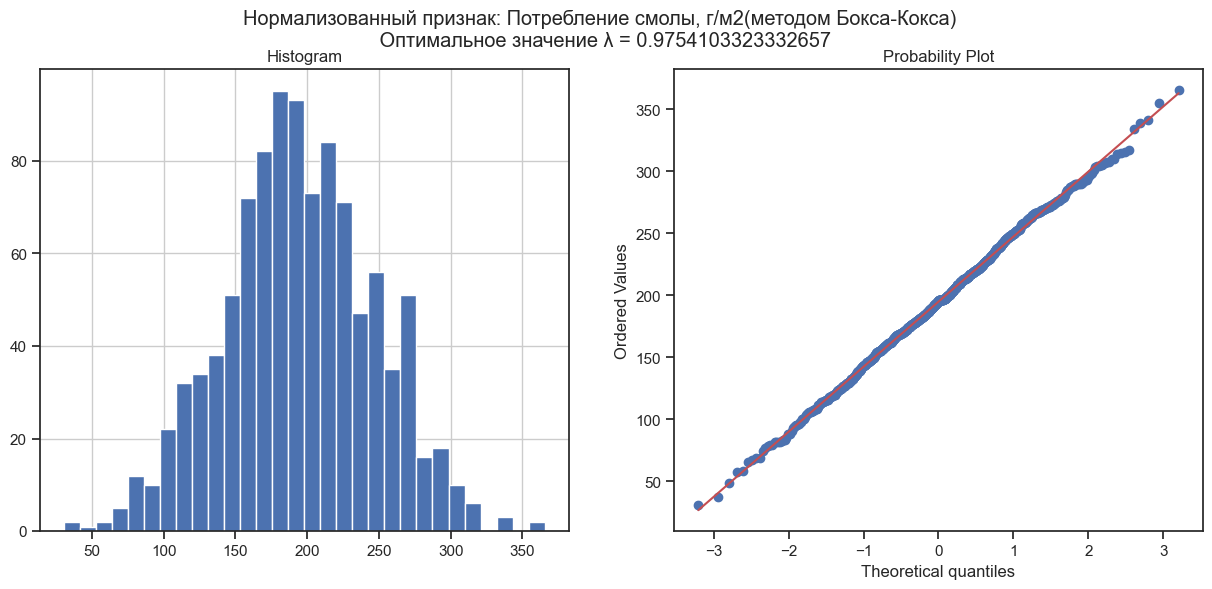

In [10]:
# также работаем только с признаками в которых нет нулей
data__ = data.copy()
for col in col_list_9:
    data__[col], param = stats.boxcox(data__[col])
    title = 'Нормализованный признак: {}(методом Бокса-Кокса) \n Оптимальное значение λ = {}'.format(col, param)
    diagnostic_plots(data__, col, title)

#### Нормализуем методом Йео-Джонсона (числа должны быть в формате float)

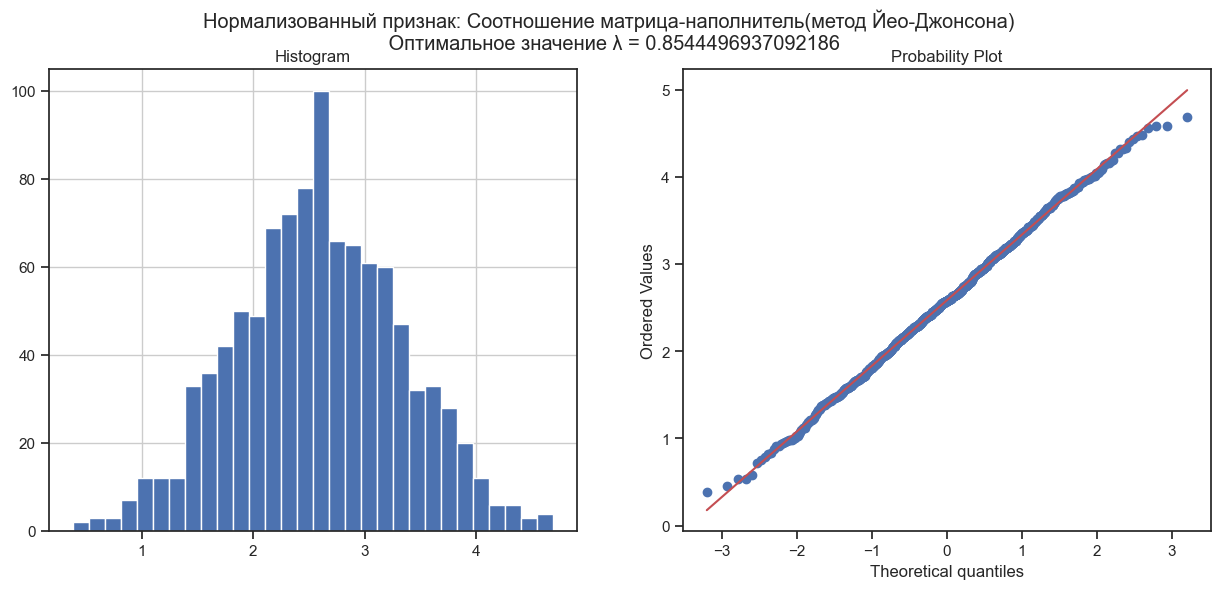

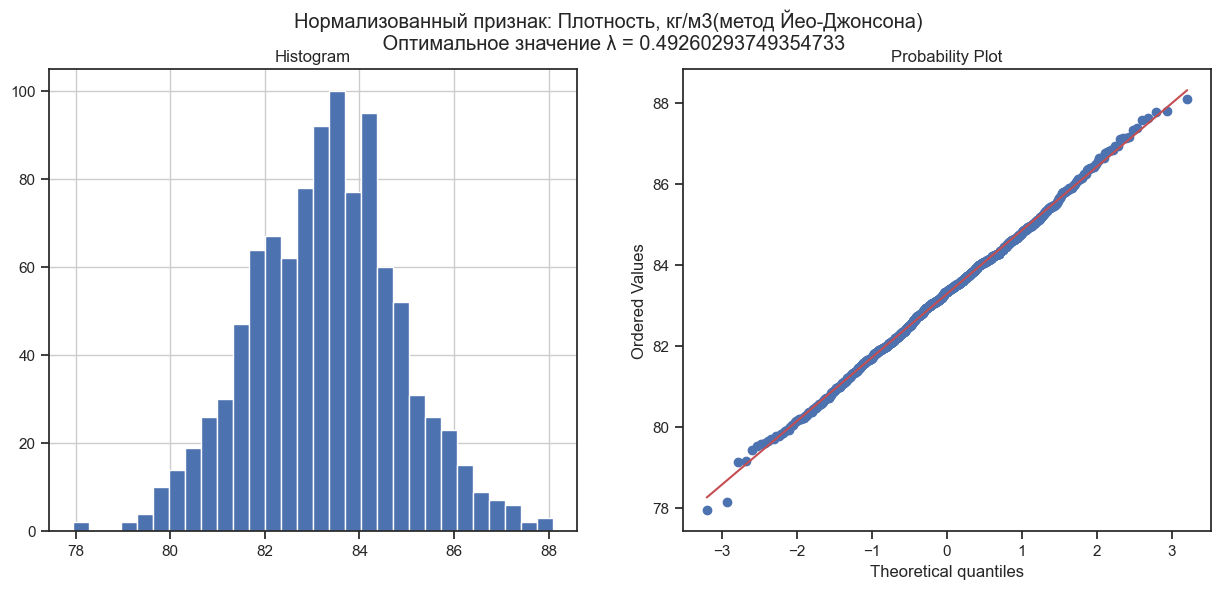

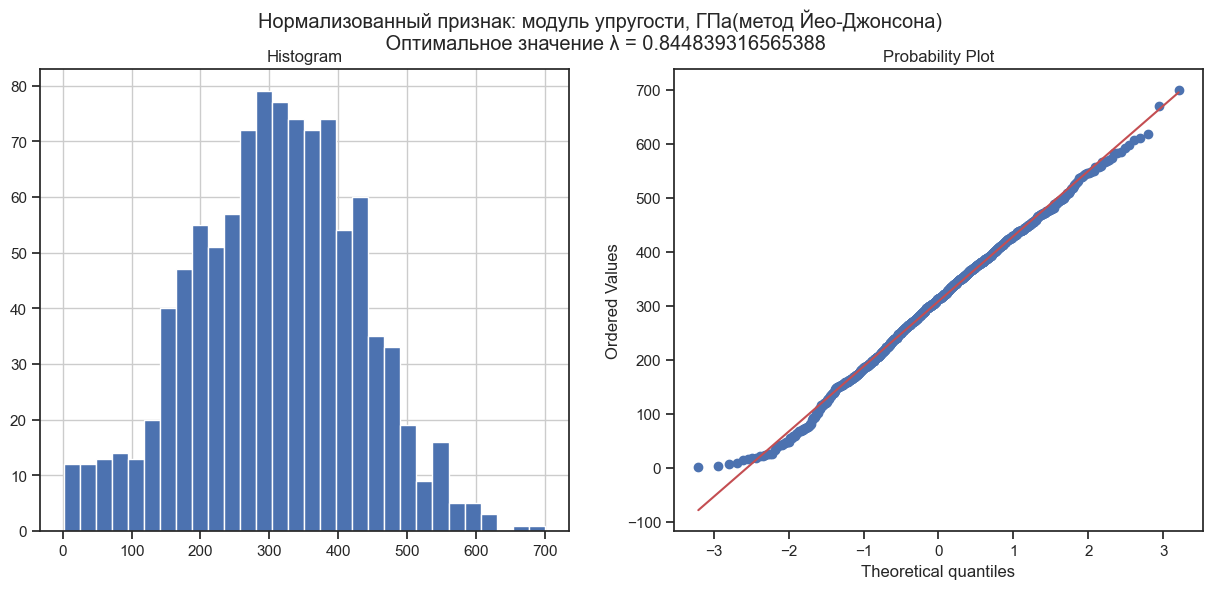

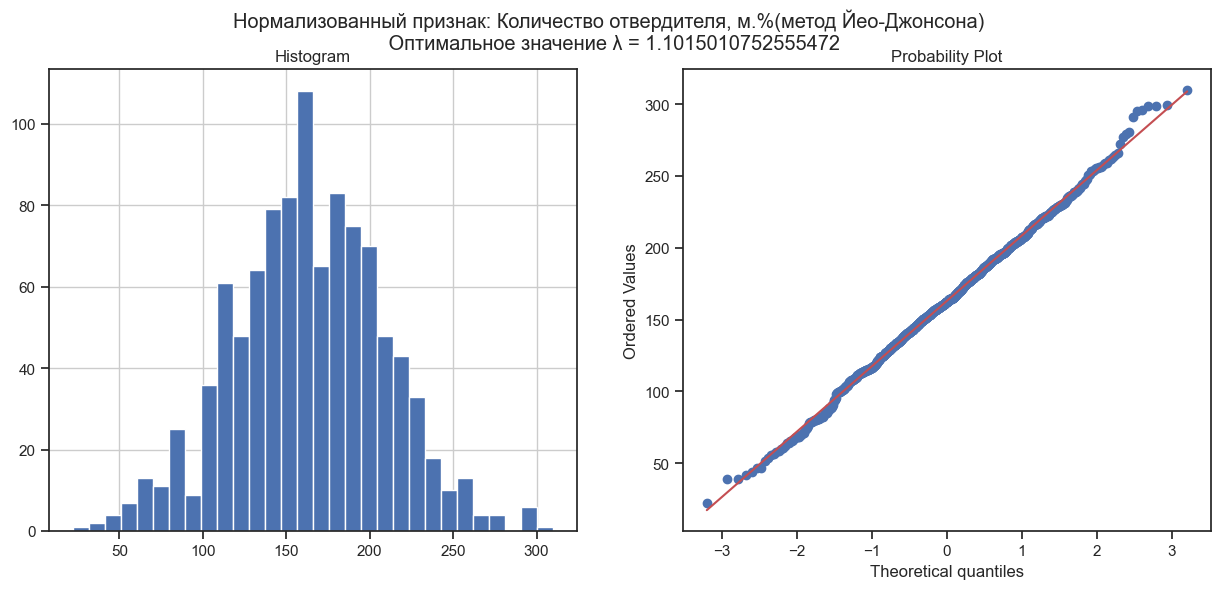

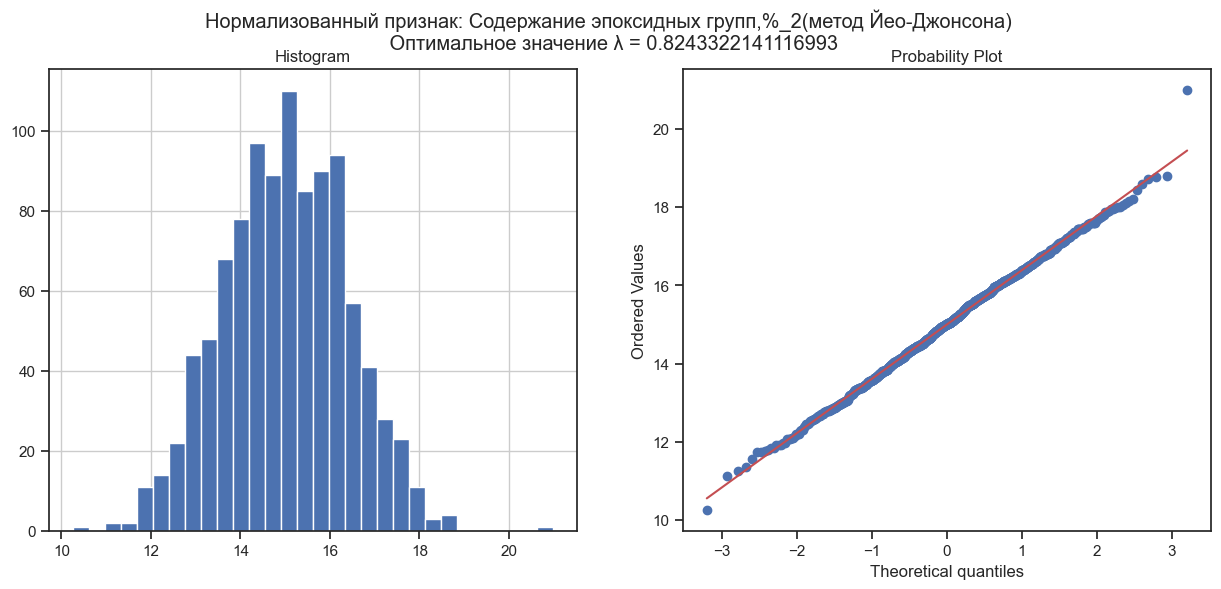

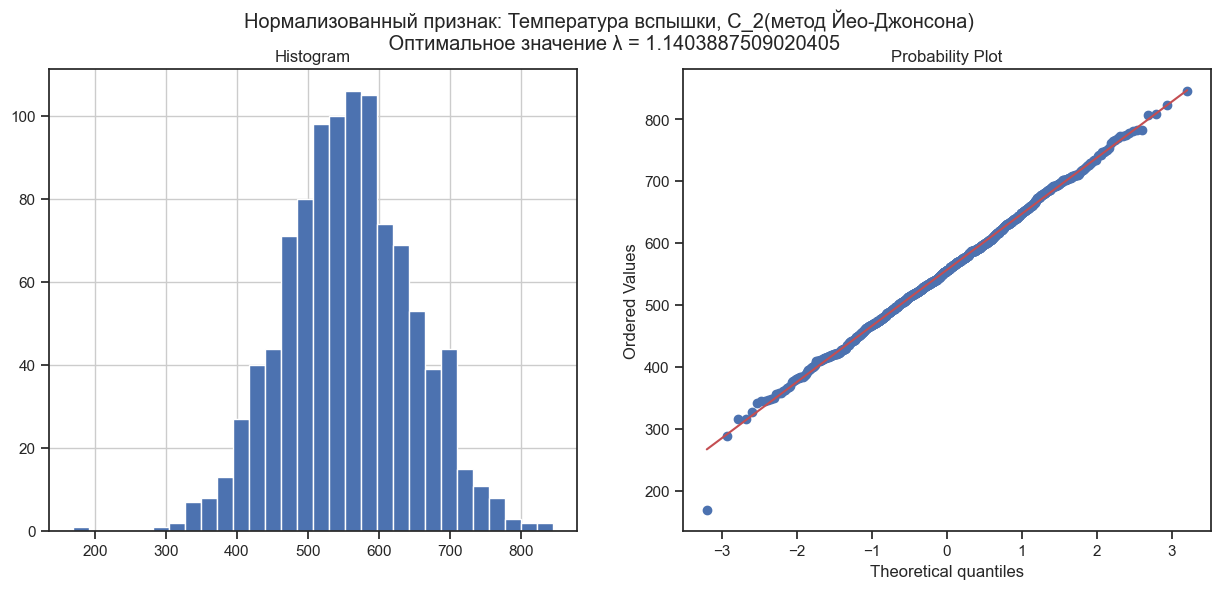

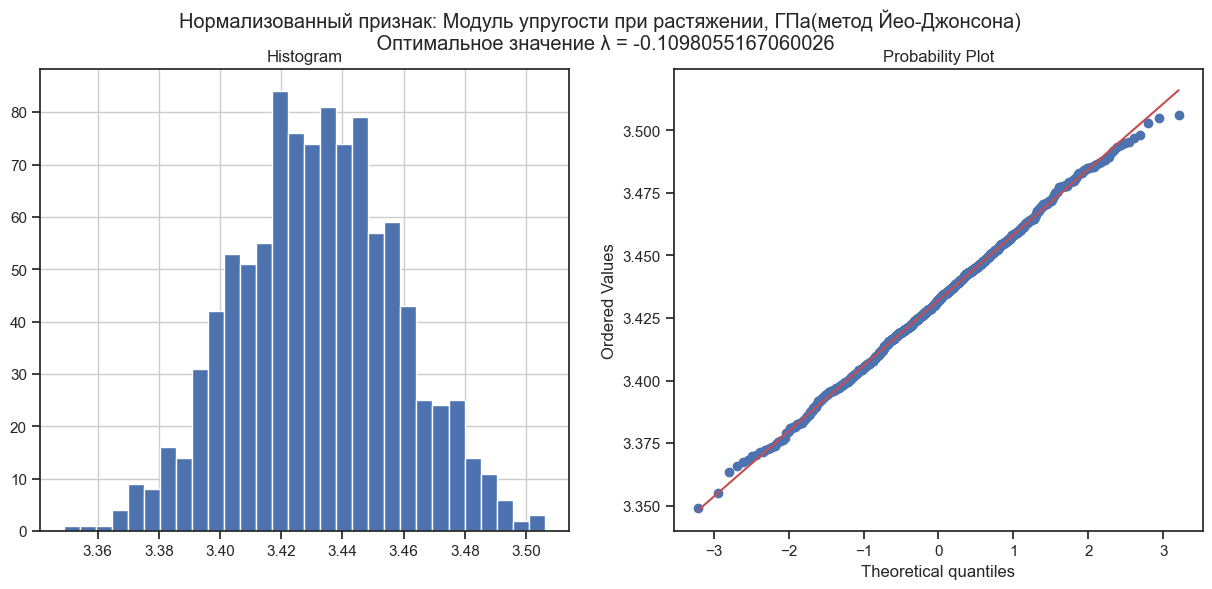

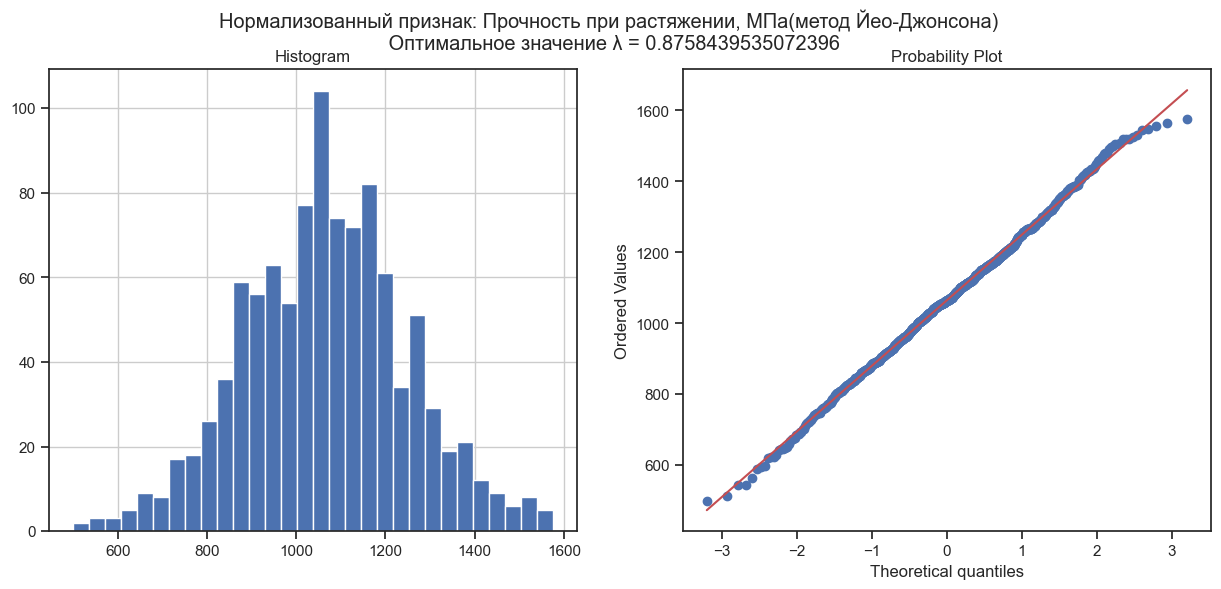

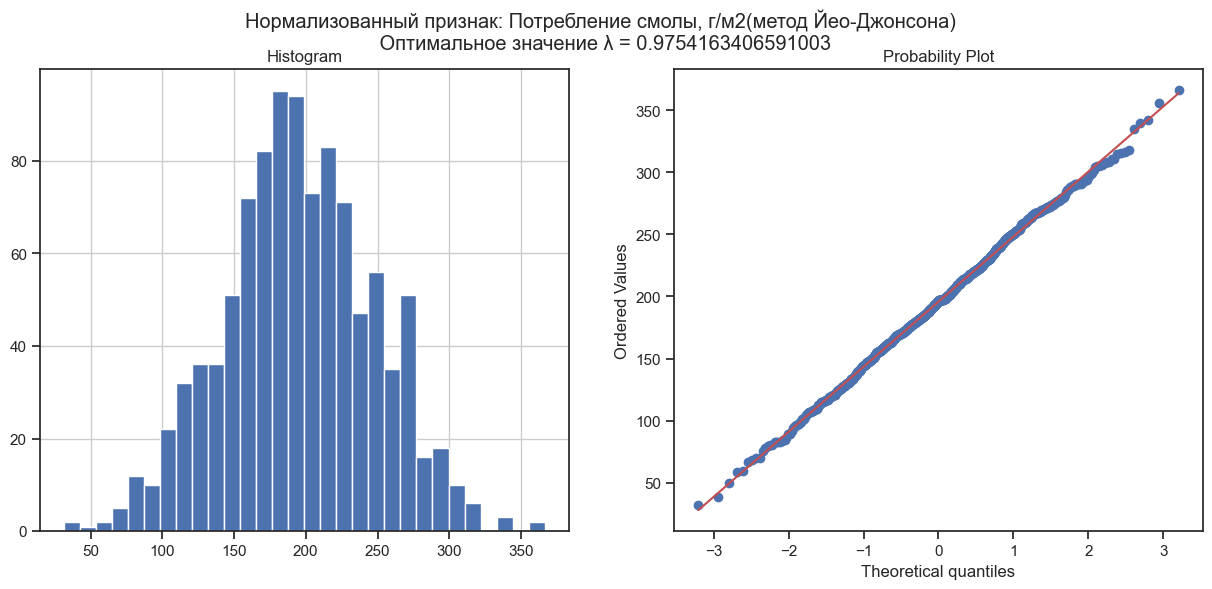

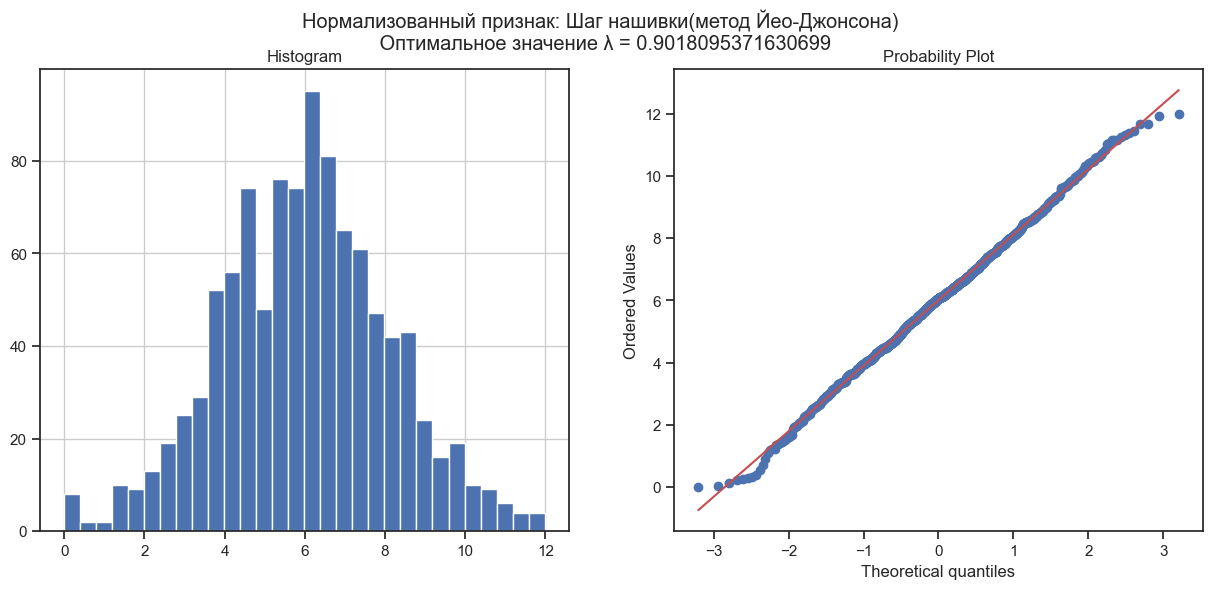

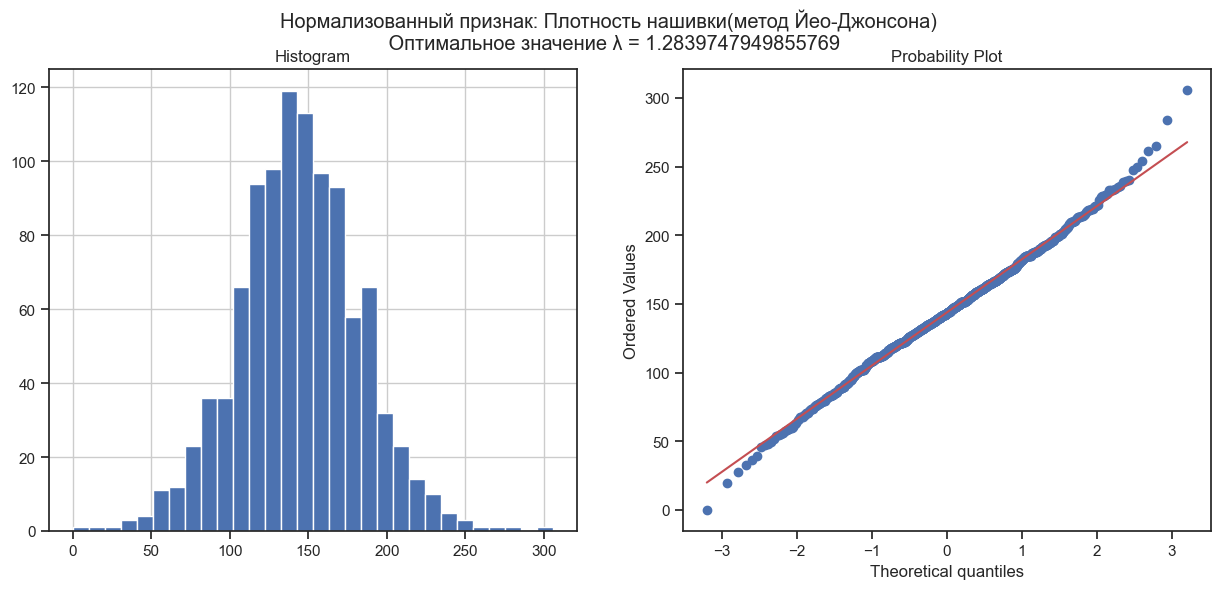

In [12]:
# все признаки в датасете выражены в цифрах в формате float за исключением отброшенного признака 'Угол нашивки, град'
data___ = data.copy()
for col in col_list_norm:
    data___[col], param = stats.yeojohnson(data___[col]) 
    title = 'Нормализованный признак: {}(метод Йео-Джонсона) \n Оптимальное значение λ = {}'.format(col, param)
    diagnostic_plots(data___, col, title)

#### Вывод: очевидно, что наиболее подходящим способом для нормализации данных является метод "Йео-Джонсона", который и будем использовать.